In [1]:
%matplotlib notebook
import numpy as np
from helper_functions import *
from complex import Complex
from molecule import Molecule

### Load molecules 

In [2]:
print("--- Ligands ----\n")

# load ligand
ligand1 = OB_to_mol(read_to_OB(filename="../../pdbqt_data/lopinavir.pdbqt", filetype="pdbqt"), mol_type=1)
print("----------\n")
ligand2 = OB_to_mol(read_to_OB(filename="../../pdbqt_data/ritonavir.pdbqt", filetype="pdbqt"), mol_type=1)


print("\n\n--- Receptor ----\n")
# load receptor
protein = OB_to_mol(read_to_OB(filename="../../pdbqt_data/6Y2F_MOD.pdbqt", filetype="pdbqt"), mol_type=-1)


--- Ligands ----

C37H4N4O5
Shape of coords: (46, 3)
Shape of features: (46, 15)
Number of heavy atoms in molecule = 46
Number of features = 15
Max distance between atoms along
x:(-8.08, 7.692, 15.772)
y:(-3.83, 4.011, 7.841)
z:(-3.817, 3.489, 7.306)
----------

C38H6N6O5
Shape of coords: (49, 3)
Shape of features: (49, 15)
Number of heavy atoms in molecule = 49
Number of features = 15
Max distance between atoms along
x:(-8.774, 9.387, 18.161)
y:(-4.406, 5.463, 9.869)
z:(-3.23, 3.093, 6.323)


--- Receptor ----

C1485H518N398O436S22
Shape of coords: (2341, 3)
Shape of features: (2341, 15)
Number of heavy atoms in molecule = 2341
Number of features = 15
Max distance between atoms along
x:(-29.056, 21.003, 50.059)
y:(-33.198, 32.099, 65.297)
z:(-13.814, 40.634, 54.448)


In [3]:
max_dist = 10
resolution = 0.1

grid = Complex(max_dist=max_dist, resolution=resolution, num_features=ligand1.num_features)
print(grid.box_size, grid.resolution, grid.max_dist)

201 0.1 10


### Create a box smaller than full protein -> atoms outside will be discarded. Original protein object can be modified with "update_mols" parameter

Some atoms are outside the box and will be discarded.


<IPython.core.display.Javascript object>


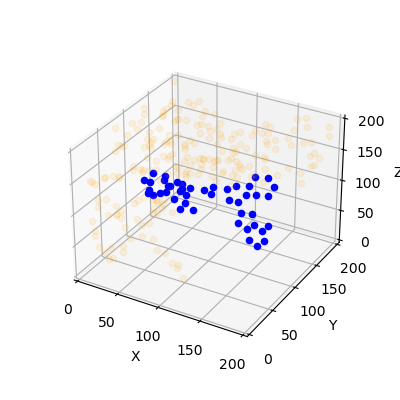

In [4]:
grid.update_tensor(mols=[ligand1, protein], update_mols=False)
grid.plot_tensor(feature_axis=-1)

### Manually crop protein and update tensor (now all atoms are within box bounds)

<IPython.core.display.Javascript object>


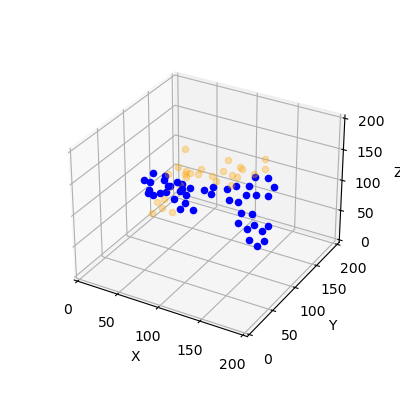

In [5]:
protein.crop(ligand1.get_centroid(), 5, 5, 5)
grid.update_tensor(mols=[ligand1, protein], update_mols=False)
grid.plot_tensor(feature_axis=-1, protein_alpha=0.3)

### Create bigger box to accomodate full protein

C1485H518N398O436S22
Shape of coords: (2341, 3)
Shape of features: (2341, 15)
Number of heavy atoms in molecule = 2341
Number of features = 15
Max distance between atoms along
x:(-29.056, 21.003, 50.059)
y:(-33.198, 32.099, 65.297)
z:(-13.814, 40.634, 54.448)
83 1 41


<IPython.core.display.Javascript object>


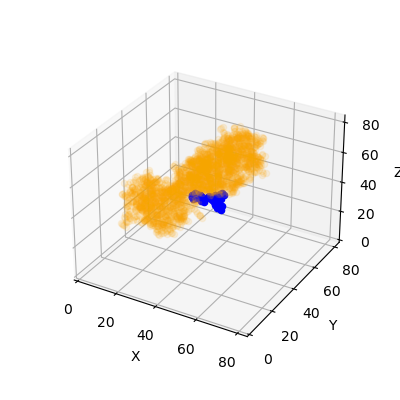

In [6]:
max_dist = 41
resolution = 1

protein = OB_to_mol(read_to_OB(filename="../../pdbqt_data/6Y2F_MOD.pdbqt", filetype="pdbqt"), mol_type=-1)

grid = Complex(max_dist=max_dist, resolution=resolution, num_features=ligand1.num_features)
print(grid.box_size, grid.resolution, grid.max_dist)
grid.update_tensor(mols=[ligand1, protein], update_mols=False)
grid.plot_tensor(feature_axis=-1)